## Importing libraries

In [11]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  
import numpy as np  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore")

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append("../")  # Adds the parent directory to the path for custom module imports  

# Custom functions  
# -----------------------------------------------------------------------  
from src.support_models import ClassificationModels, rows_colors_model

## Data loading

In [12]:
df = pd.read_csv('../data/output/complete_data_preprocessed.csv', index_col=0)

In [13]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,...,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.785714,0.0,0.383349,0.000000,0.178571,0.25,0.251732,0.00,0.090966,0.637546,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.309524,1.0,1.000000,0.046464,0.321429,0.00,0.251732,0.00,1.000000,0.167457,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.333333,0.0,1.000000,0.046464,0.571429,0.75,0.028975,0.75,0.090966,0.964666,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.476190,0.0,0.000000,0.046464,0.035714,1.00,0.251732,0.50,0.090966,0.385045,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.0,0.383349,0.046464,0.321429,0.00,0.254877,0.00,1.000000,0.070195,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model Selection Criteria

We are evaluating a model that predicts whether an employee will leave the company. In this case, we want to minimize the number of false negatives, i.e., we aim to miss as few positives as possible. False positives are also undesirable, but raising alarms for an employee who is not going to leave while thinking they will is less critical than the opposite.

Therefore, we are particularly interested in the `recall` metric over `precision`. We will also aim to maximize the `f1_score` as much as possible.

Let us recall that the `recall` metric tells us, out of all the **actually** positive cases, how many we have correctly identified.

## Model execution

In [14]:
models = ClassificationModels(df, "Attrition")

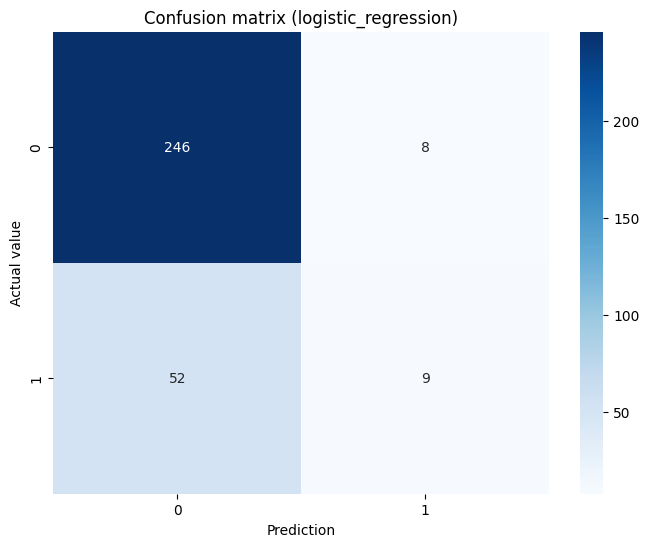

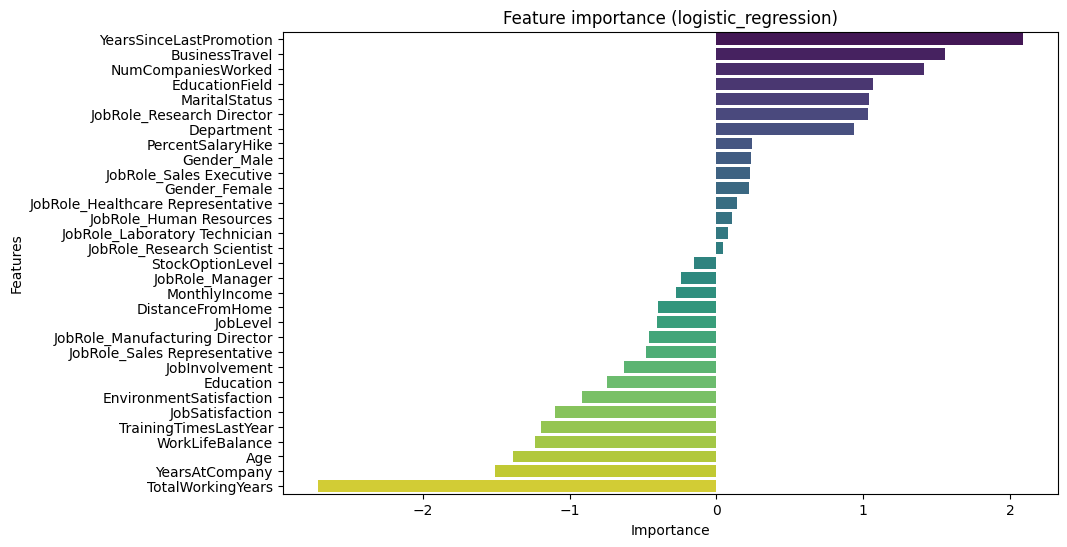

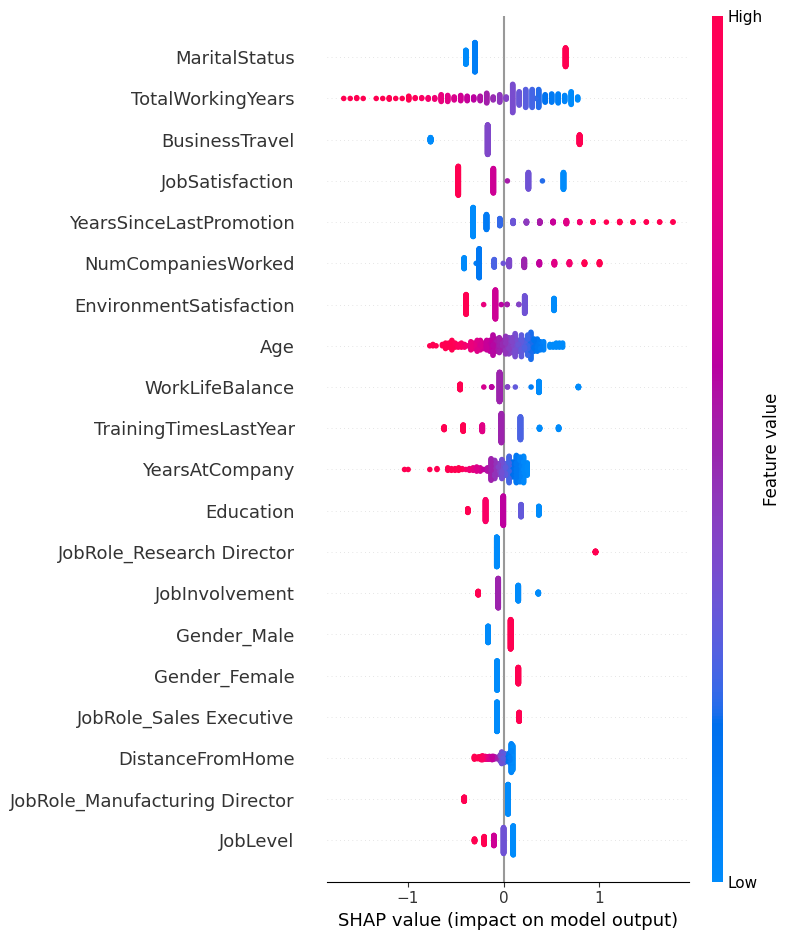

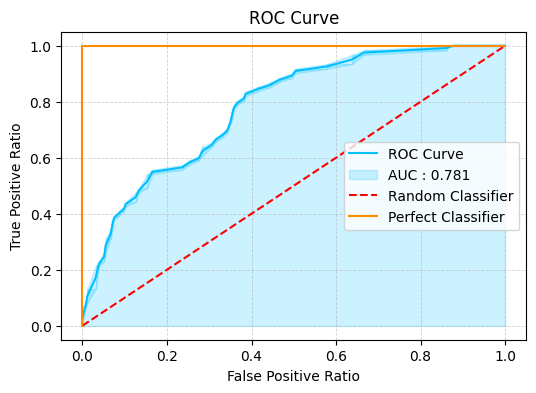

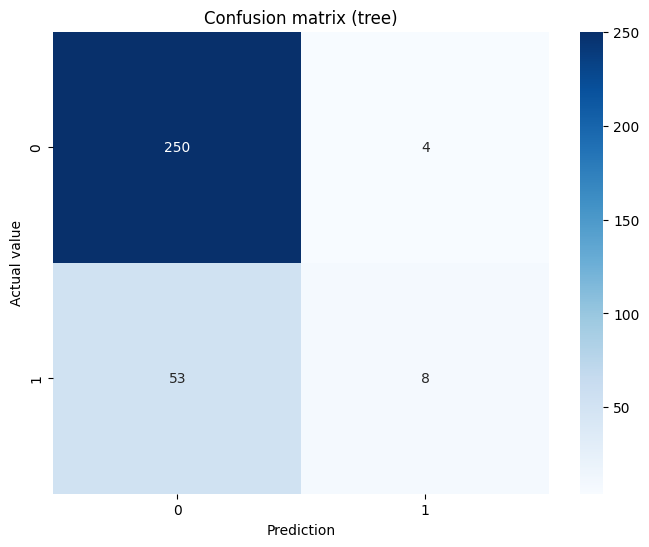

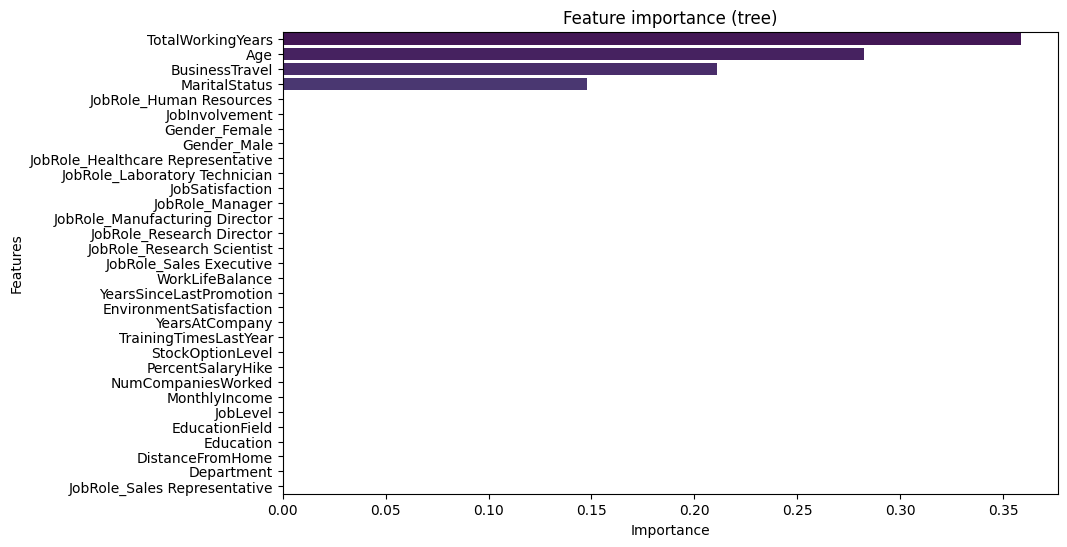

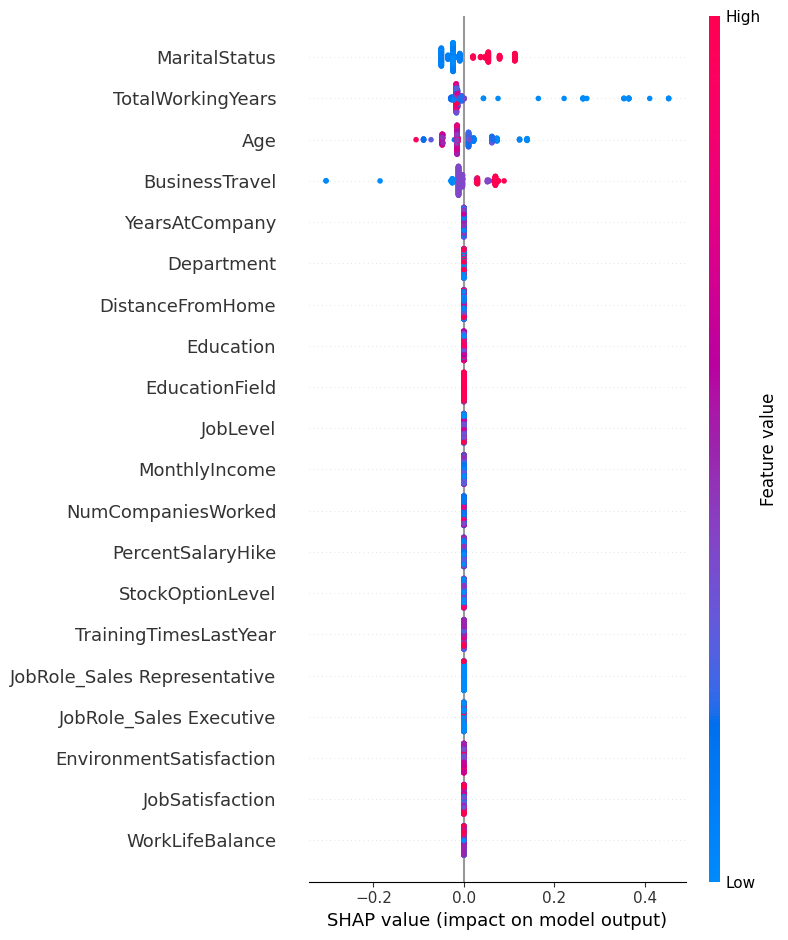

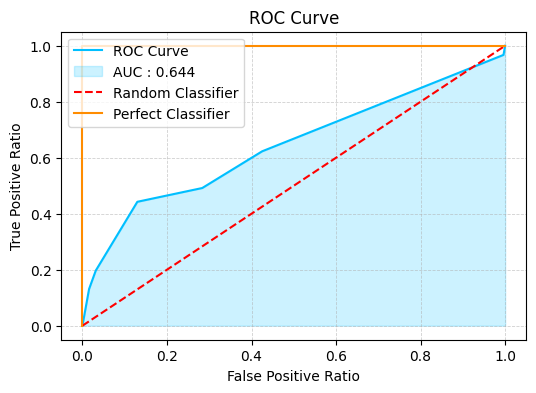

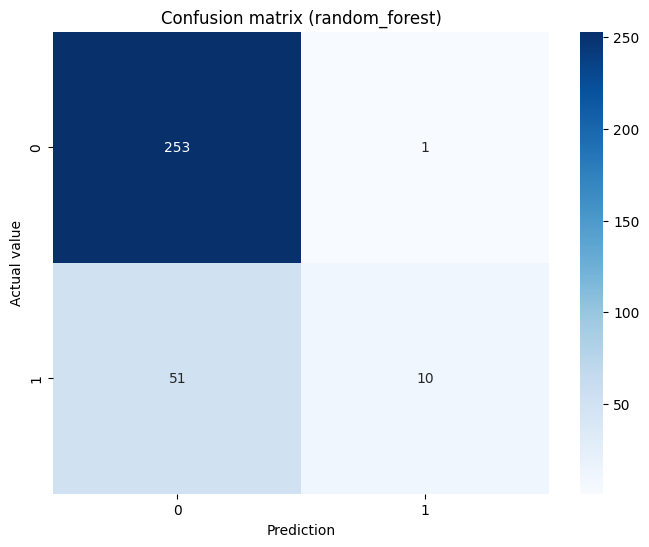

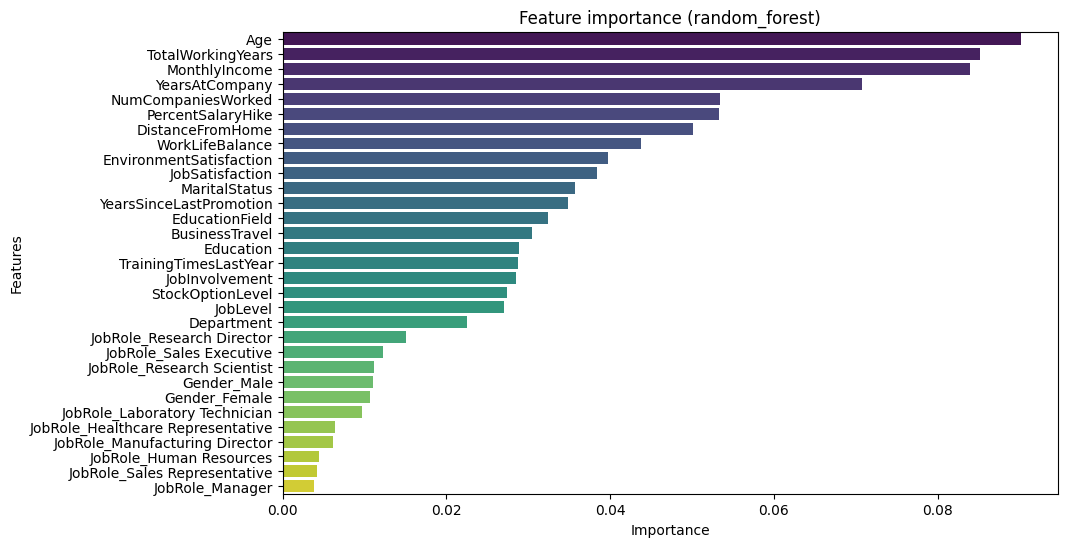

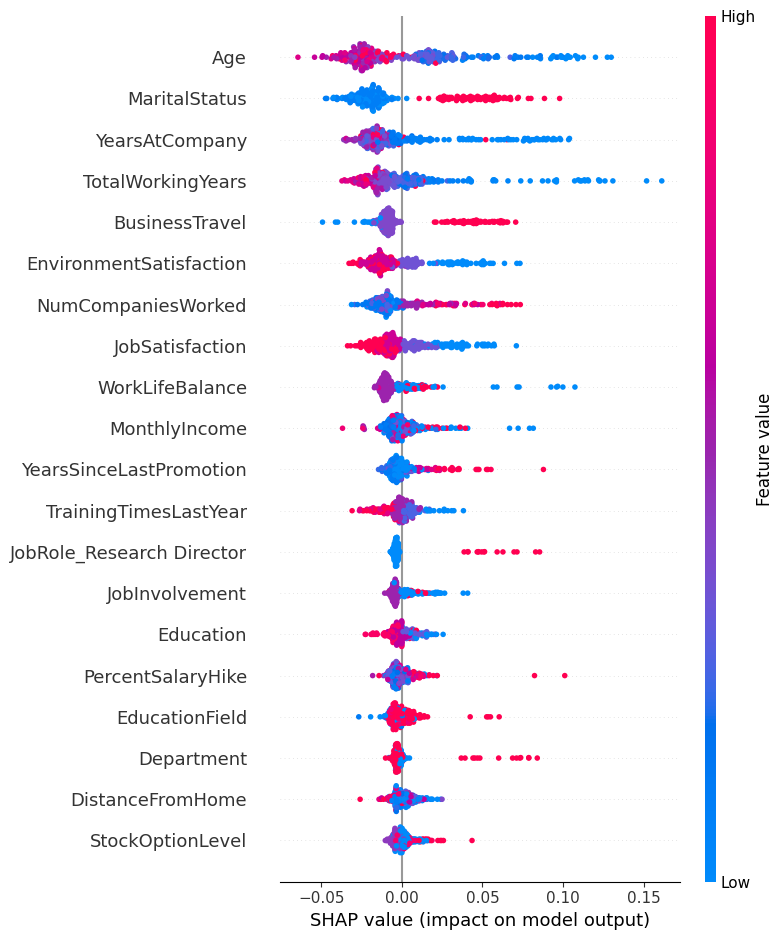

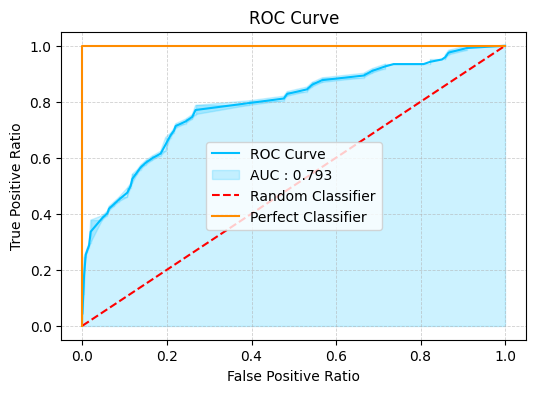

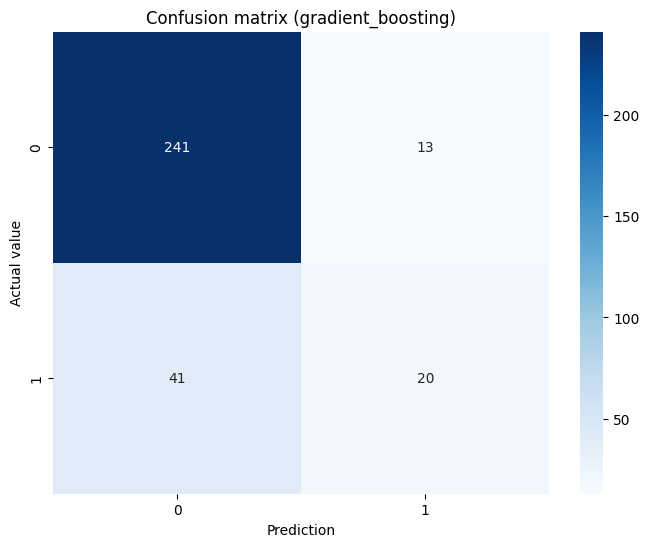

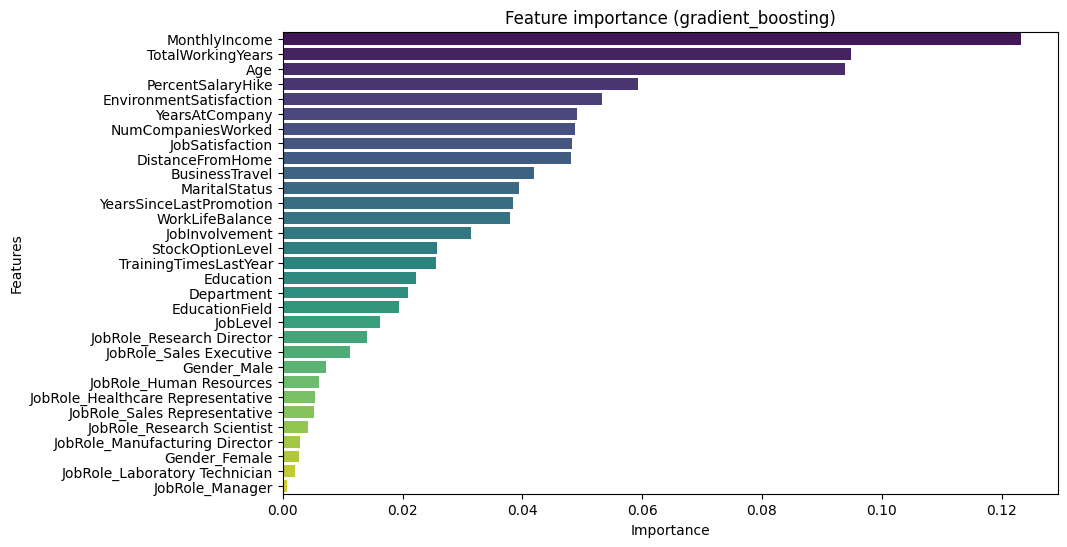

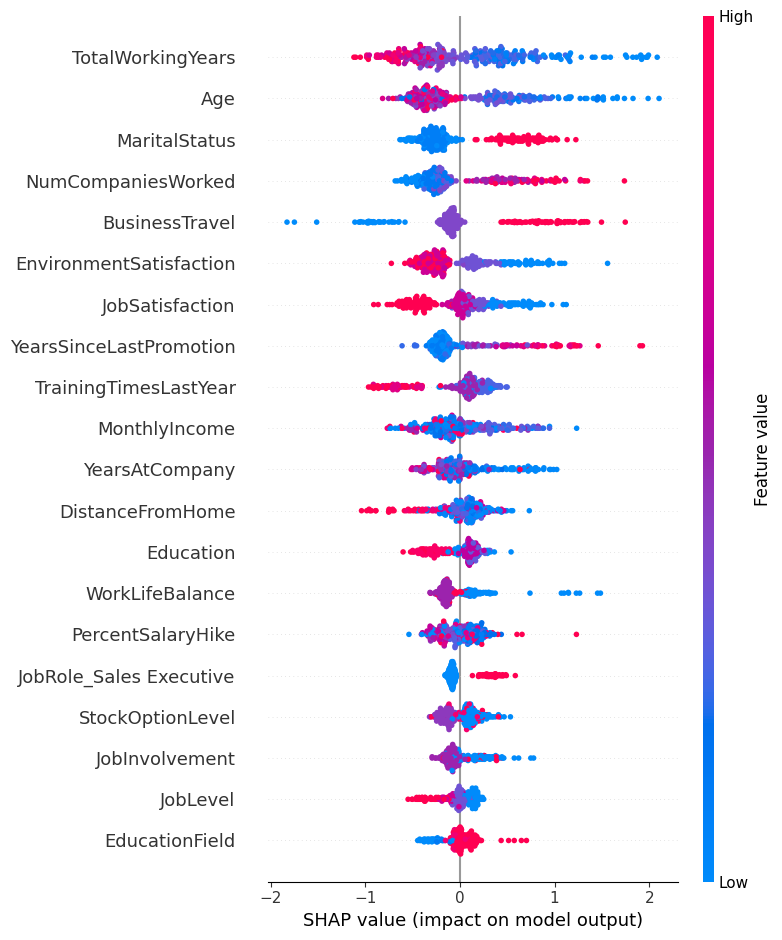

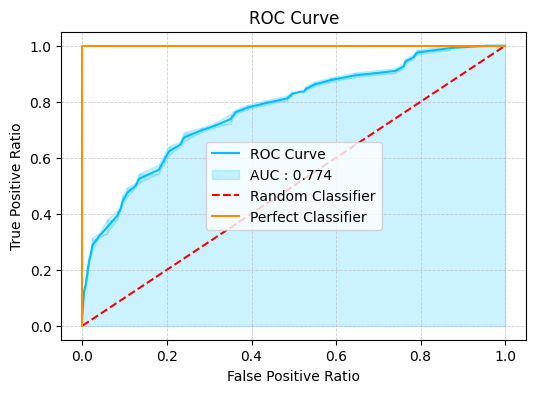

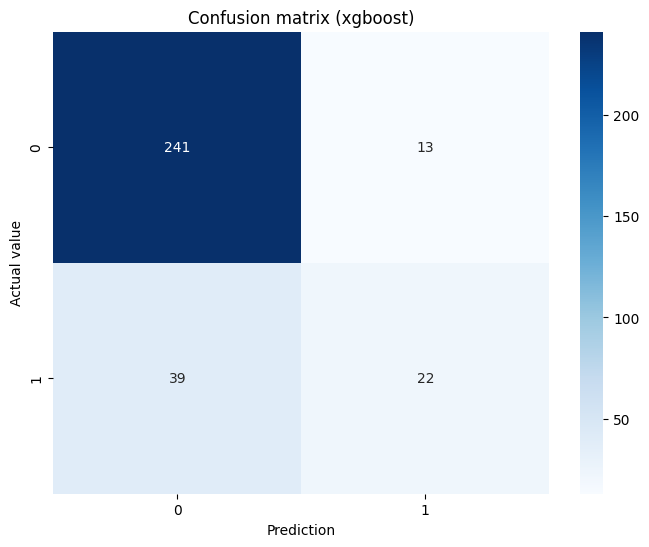

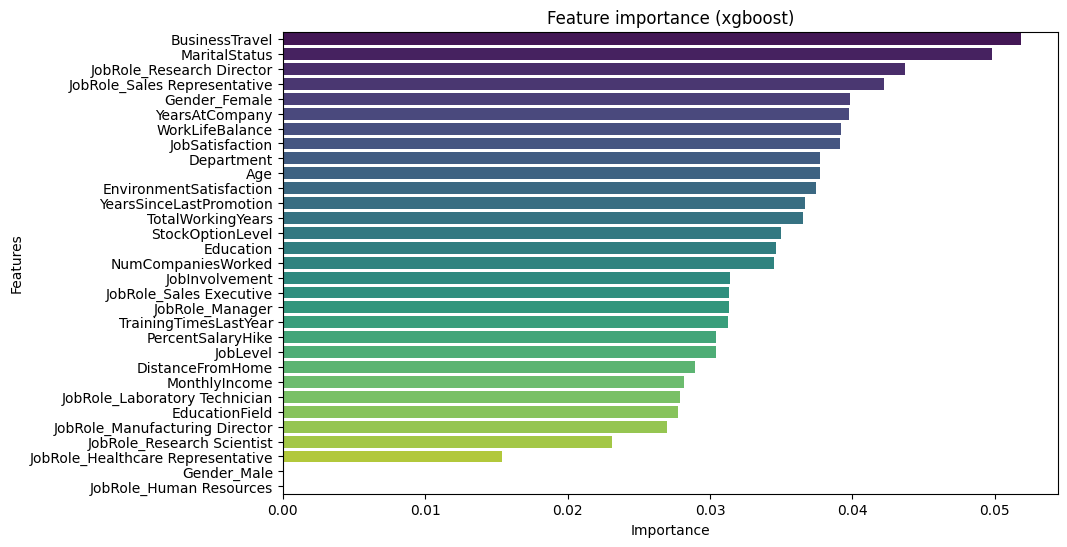

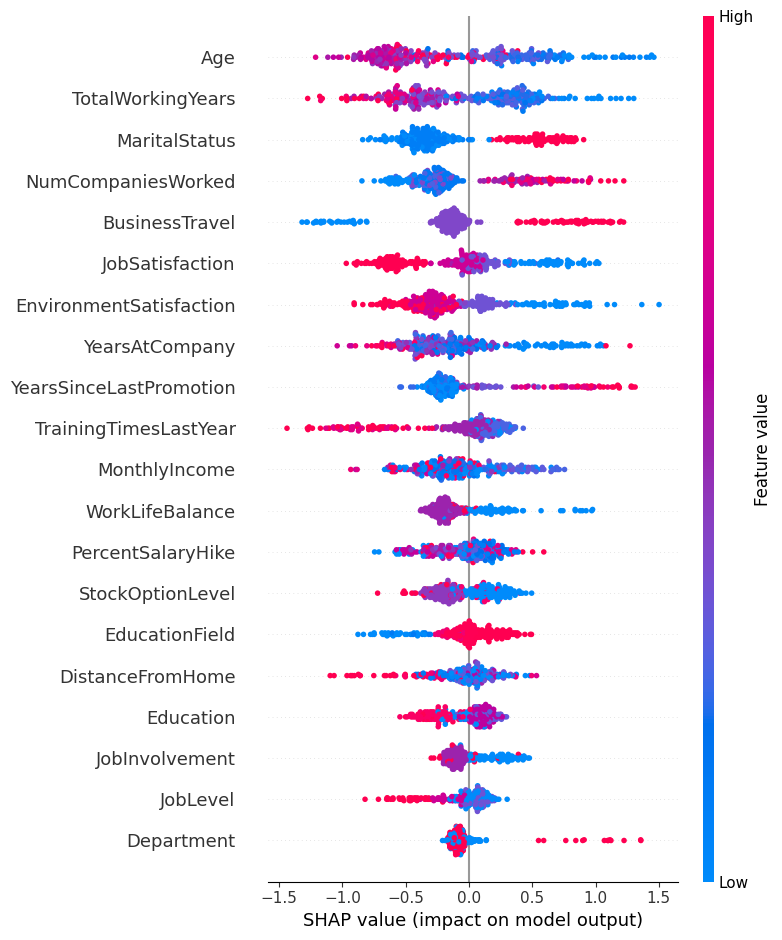

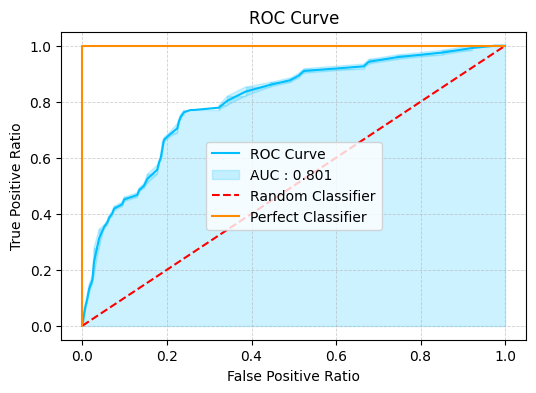

In [15]:
model_list = ["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"]
df_results = pd.DataFrame()

for model in model_list:

    models.fit_model(model, file_name=model)
    models.plot_confusion_matrix(model)
    models.plot_predictors_importance(model)
    models.plot_shap_summary(model)
    df_current_results = models.get_metrics(model)
    df_current_results["model"] = model
    df_results = pd.concat([df_results, df_current_results], axis = 0)
    models.plot_roc_curve(model)

In [18]:
df_results_colors = df_results.copy()
df_results_colors.reset_index(inplace = True, drop = True)
df_results_colors = df_results_colors.style.apply(rows_colors_model, axis=1)
df_results_colors

,accuracy,precision,recall,f1,kappa,auc,time_seconds,cores,model
0,0.862480,0.840650,0.862480,0.827353,0.238589,0.796180,3.212321,nan,logistic_regression
1,0.809524,0.768165,0.809524,0.763391,0.159851,0.780560,3.212321,nan,logistic_regression
2,0.860095,0.846720,0.860095,0.813521,0.166643,0.699017,0.640174,11.000000,tree
3,0.819048,0.794405,0.819048,0.766276,0.166086,0.643572,0.640174,11.000000,tree
4,0.979332,0.979824,0.979332,0.978702,0.915004,0.999971,89.053090,nan,random_forest
5,0.834921,0.847120,0.834921,0.784997,0.232355,0.793081,89.053090,nan,random_forest
6,0.999205,0.999206,0.999205,0.999204,0.996907,1.000000,374.362644,11.000000,gradient_boosting
7,0.828571,0.806478,0.828571,0.807517,0.335131,0.774042,374.362644,11.000000,gradient_boosting
8,0.991256,0.991345,0.991256,0.991149,0.965227,0.999818,141.461849,nan,xgboost
9,0.834921,0.815760,0.834921,0.816585,0.369272,0.801342,141.461849,nan,xgboost
